In [15]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

In [16]:
def load_data(name, mode='content'):
    epoch = 'latest'
    parts = name.split('_')
    if len(parts)==2:
        epoch = parts[1]
        name = parts[0]
    res_path = os.path.join('results', name, 'test_unknown_{}_{}'.format(mode, epoch), 'metrics')
    
    style_aware_path = os.path.join(res_path, 'style', 'final_results.txt')
    content_aware_path = os.path.join(res_path, 'content', 'final_results.txt')
    with open(style_aware_path, 'r') as f:
        data_s = f.read().split('\n')
        data_s = {i.split(':')[0]:float(i.split(':')[1]) for i in data_s}
    with open(content_aware_path, 'r') as f:
        data_c = f.read().split('\n')
        data_c = {i.split(':')[0]:float(i.split(':')[1]) for i in data_c} 
    return [data_s, data_c]

def get_results(exp_names, mode='content'):
    metrics = {'l1':[], 
               'ssim':[], 
               'msssim':[], 
               'content_acc':[], 
               'content_fid':[], 
               'style_acc':[], 
               'style_fid':[]}
    for name in exp_names:
        data = load_data(name, mode)
        content_aware_data = data[1]
        style_aware_data = data[0]
        metrics['l1'].append(content_aware_data['l1'])
        metrics['ssim'].append(content_aware_data['ssim'])
        metrics['msssim'].append(content_aware_data['msssim'])
        metrics['content_acc'].append(content_aware_data['acc'])
        metrics['content_fid'].append(content_aware_data['fid'])
        metrics['style_acc'].append(style_aware_data['acc'])
        metrics['style_fid'].append(style_aware_data['fid'])
    return pd.DataFrame(metrics, index=exp_names)
  
def show_samples(names, mode='content', num_samples=6, font_name=None, dpi=150):
    font_names = os.listdir('datasets/font/test_unknown_{}/english'.format(mode))
    if not font_name:
        font_name = random.choice(font_names)
    if not isinstance(names, list):
        names = [names]   
    english_path = 'datasets/font/test_unknown_{}/english/{}'.format(mode, font_name)
    english_image_paths = random.sample([os.path.join(english_path, name) for name in os.listdir(english_path)], 6)
    english_images = [Image.open(path) for path in english_image_paths]
    plt.figure(figsize=[6, len(names)+2], dpi=dpi)
    for i in range(6):
        english_image = english_images[i]
        plt.subplot(len(names)+2, 6, i+1)
        plt.imshow(english_image, cmap='gray')
        plt.axis('off')
    root = 'results/{0}/test_unknown_{1}_latest/images'.format(names[0], mode)
    image_paths = sorted(os.listdir(root))
    gt_image_paths =sorted([path for path in image_paths if ('gt_images.png' in path) and (font_name in path)])
    generated_image_paths = sorted([path for path in image_paths if ('generated_images.png' in path) and (font_name in path)])
    data = list(zip(gt_image_paths, generated_image_paths))
    samples = random.sample(data, num_samples)
    
    for i in range(len(names)):
        name = names[i]
        result_path = 'results/{0}/test_unknown_{1}_latest/images'.format(name, mode)
        
        for j in range(num_samples):
            generated_path = os.path.join(result_path, samples[j][1])
            generated_image = Image.open(generated_path)
            plt.subplot(len(names)+2, num_samples, (i+1)*num_samples+j+1)
            plt.imshow(generated_image, cmap='gray')
            plt.axis('off')
        
    
    for i in range(num_samples):
        gt_path = os.path.join(root, samples[i][0])
        gt_image = Image.open(gt_path)
        plt.subplot(len(names)+2, num_samples, num_samples*(len(names)+1)+i+1)
        plt.imshow(gt_image, cmap='gray')
        plt.axis('off')
    plt.show()
    
def show_fail_sample(mode='style'):
    root = 'results/MLANH/test_unknown_{}_latest/images'.format(mode)
    image_paths = sorted(os.listdir(root))
    gt_image_paths =sorted([os.path.join(root, path) for path in image_paths if ('gt_images.png' in path)])
    generated_image_paths = sorted([os.path.join(root, path) for path in image_paths if ('generated_images.png' in path)])
    data = list(zip(gt_image_paths, generated_image_paths))
    sample = random.choice(data)
    gt_image = Image.open(sample[0])
    generated_image = Image.open(sample[1])
    plt.figure(figsize=[2, 1], dpi=150)
    plt.subplot(1, 2, 1)
    plt.imshow(gt_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(generated_image, cmap='gray')
    plt.axis('off')
    plt.show()
    
def show_application(mode='content', font_name=None, dpi=150, num_samples=10, 
                     english_letters=['W+.png', 'A+.png', 'C+.png', 'V+.png'],
                    chinese_letters=[i for i in '计 算 机 视 觉 应 用 会 议'.split(' ')]):
    font_names = os.listdir('datasets/font/test_unknown_style/english')
    if not font_name:
        font_name = random.choice(font_names)
        
    english_path = 'datasets/font/test_unknown_style/english/{}'.format(font_name)
    english_image_paths = [os.path.join(english_path, name) for name in english_letters]
    english_images = [Image.open(path) for path in english_image_paths]
    plt.figure(figsize=[len(english_letters), 1], dpi=dpi)
    for i in range(len(english_letters)):
        english_image = english_images[i]
        plt.subplot(1, len(english_letters), i+1)
        plt.imshow(english_image, cmap='gray')
        plt.axis('off')
    root = 'results/MLANH/test_unknown_style_latest/images'
    image_paths = sorted(os.listdir(root))
    generated_image_paths = sorted([path for path in image_paths if ('generated_images.png' in path) and (font_name in path)])
    samples = []
    for chinese_letter in chinese_letters:
        for generated_image_path in generated_image_paths:
            if chinese_letter in generated_image_path:
                samples.append(generated_image_path)
    plt.figure(figsize=[len(chinese_letters), 1], dpi=dpi)
    for j in range(len(chinese_letters)):
        generated_path = os.path.join(root, samples[j])
        generated_image = Image.open(generated_path)
        plt.subplot(1, num_samples, j+1)
        plt.imshow(generated_image, cmap='gray')
        plt.axis('off')
    plt.show()
    
def show_dataset(num_samples=30, dpi=150, num_chinese=20, num_english=6):
    root = 'datasets/font/train'
    chinese_root = os.path.join(root, 'chinese')
    english_root = os.path.join(root, 'english')
    font_names = os.listdir(chinese_root)
    samples = random.sample(font_names, num_samples)
    plt.figure(figsize=[num_chinese+num_english, num_samples], dpi=dpi)
    for i in range(num_samples):
        english_font_path = os.path.join(english_root, samples[i])
        chinese_font_path = os.path.join(chinese_root, samples[i])
        english_paths = [os.path.join(english_font_path, path) for path in os.listdir(english_font_path)]
        chinese_paths = [os.path.join(chinese_font_path, path) for path in os.listdir(chinese_font_path)]
        english_samples = random.sample(english_paths, num_english)
        chinese_samples = random.sample(chinese_paths, num_chinese)
        english_images = [Image.open(path) for path in english_samples]
        chinese_images = [Image.open(path) for path in chinese_samples]
        for j in range(num_english):
            english_image = english_images[j]
            plt.subplot(num_samples, num_chinese+num_english, i*(num_chinese+num_english)+j+1)
            plt.imshow(english_image, cmap='gray')
            plt.axis('off')
        for j in range(num_chinese):
            chinese_image = chinese_images[j]
            plt.subplot(num_samples, num_chinese+num_english, i*(num_chinese+num_english)+j+num_english+1)
            plt.imshow(chinese_image, cmap='gray')
            plt.axis('off')
    plt.show()

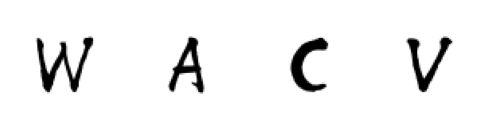

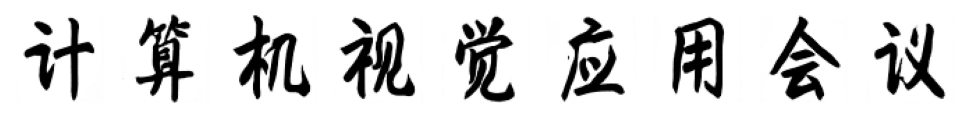

In [38]:
show_application()

# Test Unknown Content

In [ ]:
content_table = get_results(['emd', 'dfs', 'MLANH'], mode='content')
content_table

# Test Unknown Style

In [ ]:
style_table = get_results(['emd', 'dfs', 'MLANH'], mode='style')
style_table

# Show Results

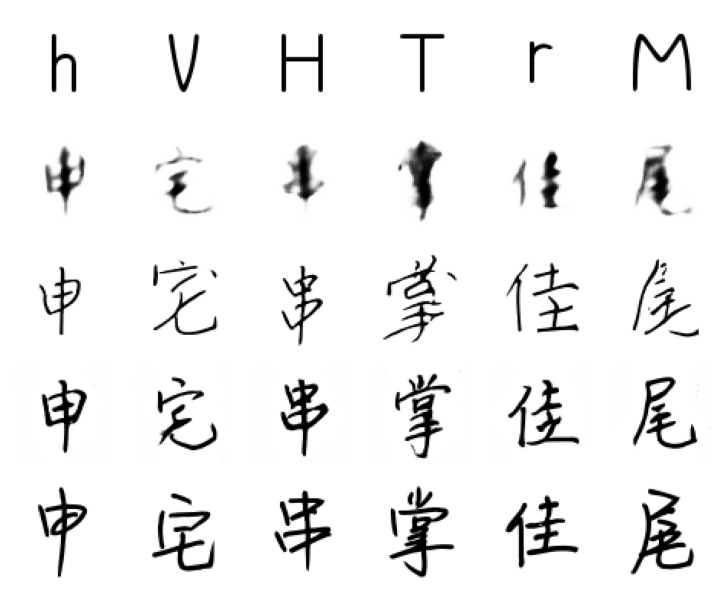

In [259]:
show_samples(['emd', 'dfs', 'MLANH'], mode='content')

# Receptive Filed Analysis

In [ ]:
while True:
    font_names = [name[:-4] for name in os.listdir('layer_attention/weights')]
    font_name = random.choice(font_names)
    weight_path = 'layer_attention/weights/{}.txt'.format(font_name)
    with open(weight_path, 'r') as f:
        weight = [float(i) for i in f.read().split(' ')]
    style_images_path = ['layer_attention/images/{}_{}.png'.format(font_name, i) for i in range(6)]
    style_images = [Image.open(style_image_path) for style_image_path in style_images_path]
    plt.figure(figsize=[7, 1], dpi=150)
    for i in range(6):
        style_image = style_images[i]
        plt.subplot(1, 7, i+1)
        plt.imshow(style_image, cmap='gray')
        plt.axis('off')
    ax = plt.subplot(1, 7, 7)
    ax.bar([0, 1, 2], weight, facecolor='red',alpha=0.5, edgecolor='black', tick_label=['13', '21', '37'])
    plt.ylim([0, 1])
    plt.yticks([])
    for x,y in zip([0, 1, 2],weight):
        ax.text(x, y+0.01, '{:.2f}'.format(y), ha='center', va='bottom', size=5)
    plt.show()
    if weight[0]>0.49:
        break